This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [6]:
imdb.load_data? #사용법 알기기

SyntaxError: ignored

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
train_labels[0] #positive

1

In [3]:
max([max(sequence) for sequence in train_data]) #단어 maximum값이 어떤걸로 코딩되었는지 (아마 단어가 0부터 9999까지 총 10000개의 단어로 구성되어있ㅇㅁㅁ)

9999

**Decoding reviews back to text**

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join( #join:리스트의 각각을 " "로 묶어줌줌
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 1us/step


In [12]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [5]:
reverse_word_index.get(14 - 3, "?")

'this'

In [6]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
dict([(3,4),(5,6)])

{3: 4, 5: 6}

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): #dimension=1000: 단어를 1000개 사용(input:1000차원)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. #타켓 words 에 1 부여
    return results
x_train = vectorize_sequences(train_data) #vectorized training data
x_test = vectorize_sequences(test_data) #vectorized test data

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train.shape

(25000, 10000)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") #binary classification이면 꼭 sigmoid 써서 output이 (0~1) 나오도록
])

**Compiling the model**

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy", #sigmoid랑 짝꿍
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 56ms/step - loss: 0.5835 - accuracy: 0.7166 - val_loss: 0.4927 - val_accuracy: 0.7646
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3760 - accuracy: 0.8841 - val_loss: 0.3414 - val_accuracy: 0.8801
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2664 - accuracy: 0.9180 - val_loss: 0.3058 - val_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2103 - accuracy: 0.9331 - val_loss: 0.3100 - val_accuracy: 0.8749
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1738 - accuracy: 0.9451 - val_loss: 0.2784 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1490 - accuracy: 0.9535 - val_loss: 0.2840 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1273 - accuracy: 0.9625 - val_loss: 0.3156 - val_accuracy: 0.8742
Epoch 8/20
30

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

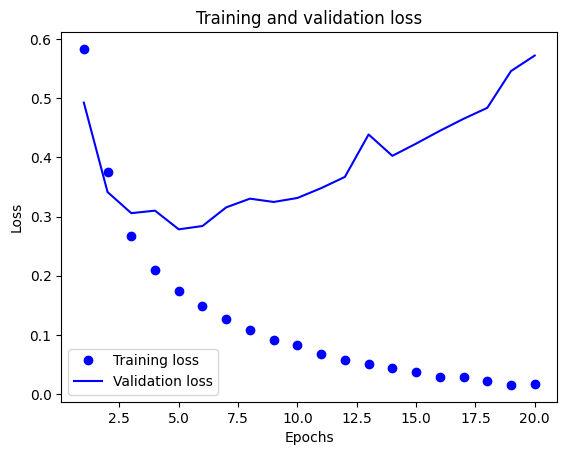

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() #validate loss가 overfitting되기 전인 epoch=4로 수정정

**Plotting the training and validation accuracy**

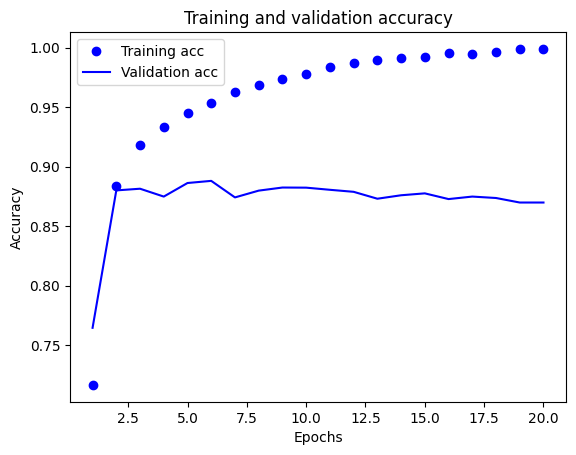

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) #모델 학습 후 모델의 성능이 어느정도인지 확인할때 사용(검증데이터를 얼마나 잘 맞히는가) , 정답이라 생각해서 test data set 에 evaluate

Epoch 1/4
49/49 [==============================] - 2s 13ms/step - loss: 0.4675 - accuracy: 0.8111
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2790 - accuracy: 0.9031
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2151 - accuracy: 0.9235
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2940 - accuracy: 0.8822


In [15]:
results

[0.29403266310691833, 0.8822000026702881]

### Using a trained model to generate predictions on new data

In [16]:
model.predict(x_test) #우리 모형이어떤 값을 내는지 predict

782/782 [==============================] - 2s 2ms/step


array([[0.17662306],
       [0.9990729 ],
       [0.5668748 ],
       ...,
       [0.09181373],
       [0.07168885],
       [0.3490988 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [17]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [18]:
len(train_data)

8982

In [19]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [20]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 1s 1us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[0] #?:3번째 토픽 카테고리

3

In [ ]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [21]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[3]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
train_labels[40]

3

**Encoding the labels**

In [23]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension)) #기사개수, 카테고리개수
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [24]:
y_train[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
train_labels[0]

3

In [26]:
y_train[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building your model

**Model definition**

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [29]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 31ms/step - loss: 2.9947 - accuracy: 0.4658 - val_loss: 2.1416 - val_accuracy: 0.6040
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.7258 - accuracy: 0.6709 - val_loss: 1.4659 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.2473 - accuracy: 0.7303 - val_loss: 1.2234 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9986 - accuracy: 0.7794 - val_loss: 1.0987 - val_accuracy: 0.7540
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8313 - accuracy: 0.8195 - val_loss: 1.0250 - val_accuracy: 0.7640
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6999 - accuracy: 0.8507 - val_loss: 0.9530 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5812 - accuracy: 0.8797 - val_loss: 0.9381 - val_accuracy: 0.7860
Epoch 8/20
16

**Plotting the training and validation loss**

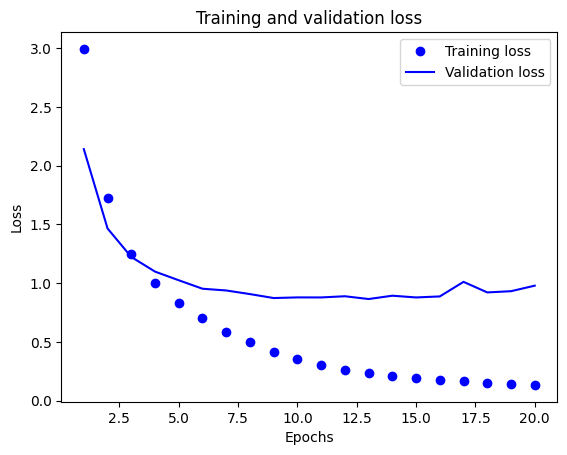

In [32]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

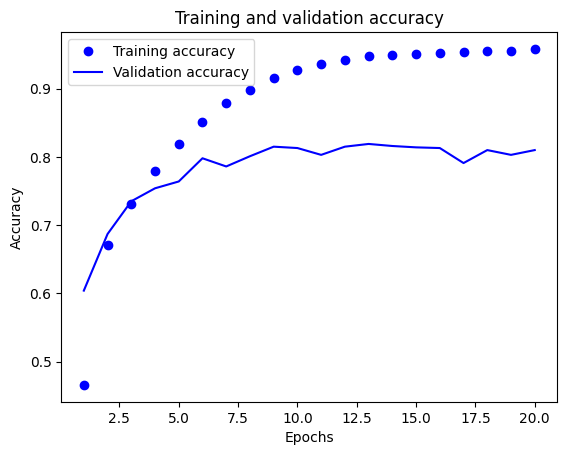

In [33]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [34]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 2.7082 - accuracy: 0.5262
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.4896 - accuracy: 0.6879
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.1222 - accuracy: 0.7605
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9169 - accuracy: 0.8072
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7539 - accuracy: 0.8402
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6241 - accuracy: 0.8667
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5221 - accuracy: 0.8855
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4401 - accuracy: 0.9047
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9113 - accuracy: 0.7898


In [35]:
results # 78%정도의 정확성..?

[0.911329984664917, 0.7898486256599426]

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy) #label을 랜덤으로 셔플링 하면 17%정도 나옴. 우리 모형으로 하면 78%정도 나오니깐 모형 잘 만들었다고 생각해도 됨됨
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1918967052537845

### Generating predictions on new data

In [37]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [38]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
np.argmax(predictions[0])

4

### A different way to handle the labels and the loss

In [39]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [40]:
y_train[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [41]:
np.min(y_train)

0

In [42]:
np.max(y_train) #0~45까지 총 46개 데이터 잘 있으면 sparse loss달아서 쓰면됨

45

In [43]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [44]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 12ms/step - loss: 3.5621 - accuracy: 0.2403 - val_loss: 3.2860 - val_accuracy: 0.4500
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 2.9041 - accuracy: 0.3210 - val_loss: 2.6650 - val_accuracy: 0.3000
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 2.2406 - accuracy: 0.3504 - val_loss: 1.9545 - val_accuracy: 0.6300
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.5273 - accuracy: 0.6611 - val_loss: 1.4890 - val_accuracy: 0.6400
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2635 - accuracy: 0.6716 - val_loss: 1.4098 - val_accuracy: 0.6500
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1714 - accuracy: 0.6789 - val_loss: 1.3809 - val_accuracy: 0.6420
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1065 - accuracy: 0.6921 - val_loss: 1.3817 - val_accuracy: 0.6510
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [45]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [46]:
train_data.shape

(404, 13)

In [47]:
train_targets.shape

(404,)

In [48]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [ ]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [49]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std #표준화

In [ ]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

### Building your model

**Model definition**

In [50]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1) #여기서는 softmax,sigmoid 하면 안됨. y가 퍼져있어서....?
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [51]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0) #history를 설정하지 않아서 어디서 오버피팅이 일어났는지 모름->그래서 histroy설정해야함
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[2.001558303833008, 2.522097110748291, 2.4374098777770996, 2.4293484687805176]

In [ ]:
np.mean(all_scores)

2.347603440284729

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

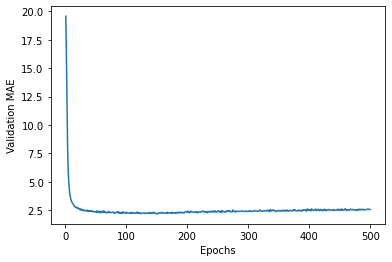

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

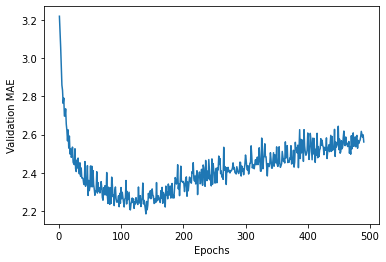

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.8307 - mae: 2.5195


In [ ]:
test_mae_score

2.519526958465576

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([8.2390585], dtype=float32)

### Wrapping up

## Summary